<a href="https://colab.research.google.com/github/Aashish-kamath/Aashish-kamath/blob/main/Copy_of_Crop_Recommendation_Using_Weather_and_Soil_Content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
siddharthss_crop_recommendation_dataset_path = kagglehub.dataset_download('siddharthss/crop-recommendation-dataset')

print('Data source import complete.')


100%|██████████| 63.7k/63.7k [00:00<00:00, 13.2MB/s]

Extracting files...
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import warnings
import os
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [ ]:
#Load File
df = pd.read_csv('/content/crop_recommendation.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df = df.rename(columns={'N': 'Nitrogen (N)'})
df = df.rename(columns={'P': 'Phosphorous (P)'})
df = df.rename(columns={'K': 'Potassium (K)'})

In [ ]:
#Exploratory Data Analysis

In [ ]:
df.dtypes
#All data types look good, no need to change any data types.

,0
Nitrogen (N),int64
Phosphorous (P),int64
Potassium (K),int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.describe()

,Nitrogen (N),Phosphorous (P),Potassium (K),temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463660
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958397
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()
#None null values, all look good so far.

,0
Nitrogen (N),0
Phosphorous (P),0
Potassium (K),0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<ipython-input-12-f66a06fb84b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bplot = sns.countplot(y='label',data=df, palette="muted")


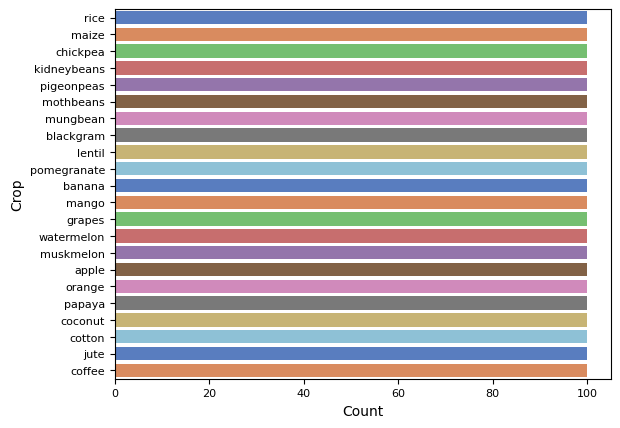

In [ ]:
#Check if data is balanced
bplot = sns.countplot(y='label',data=df, palette="muted")
bplot.set_ylabel('Crop', fontsize=10)
bplot.set_xlabel('Count', fontsize=10)
bplot.tick_params(labelsize=8)

In [ ]:
#data set without column 'label'
df_2 = df.drop(columns=['label'])

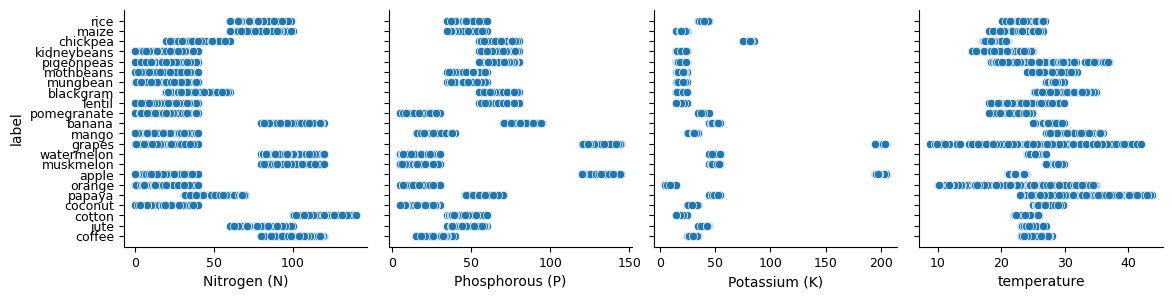

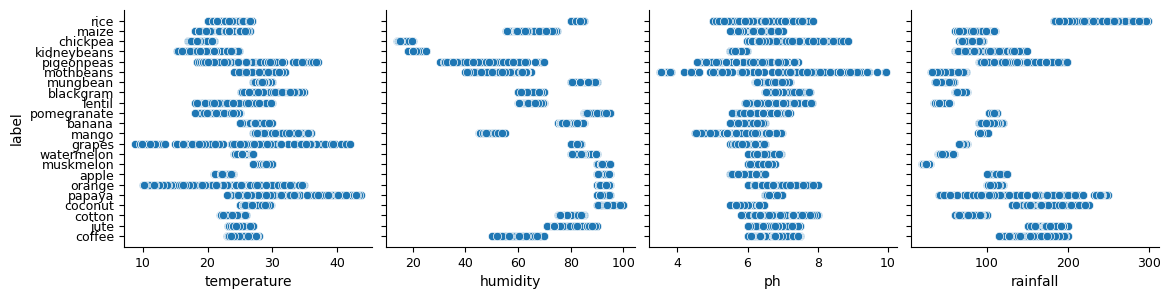

In [ ]:
for i in range(0, 6, 3):
   pplot = sns.pairplot(data=df,
                x_vars=df.columns[i:i+4],
                y_vars=['label'], height=3)
   pplot.tick_params(labelsize=9)

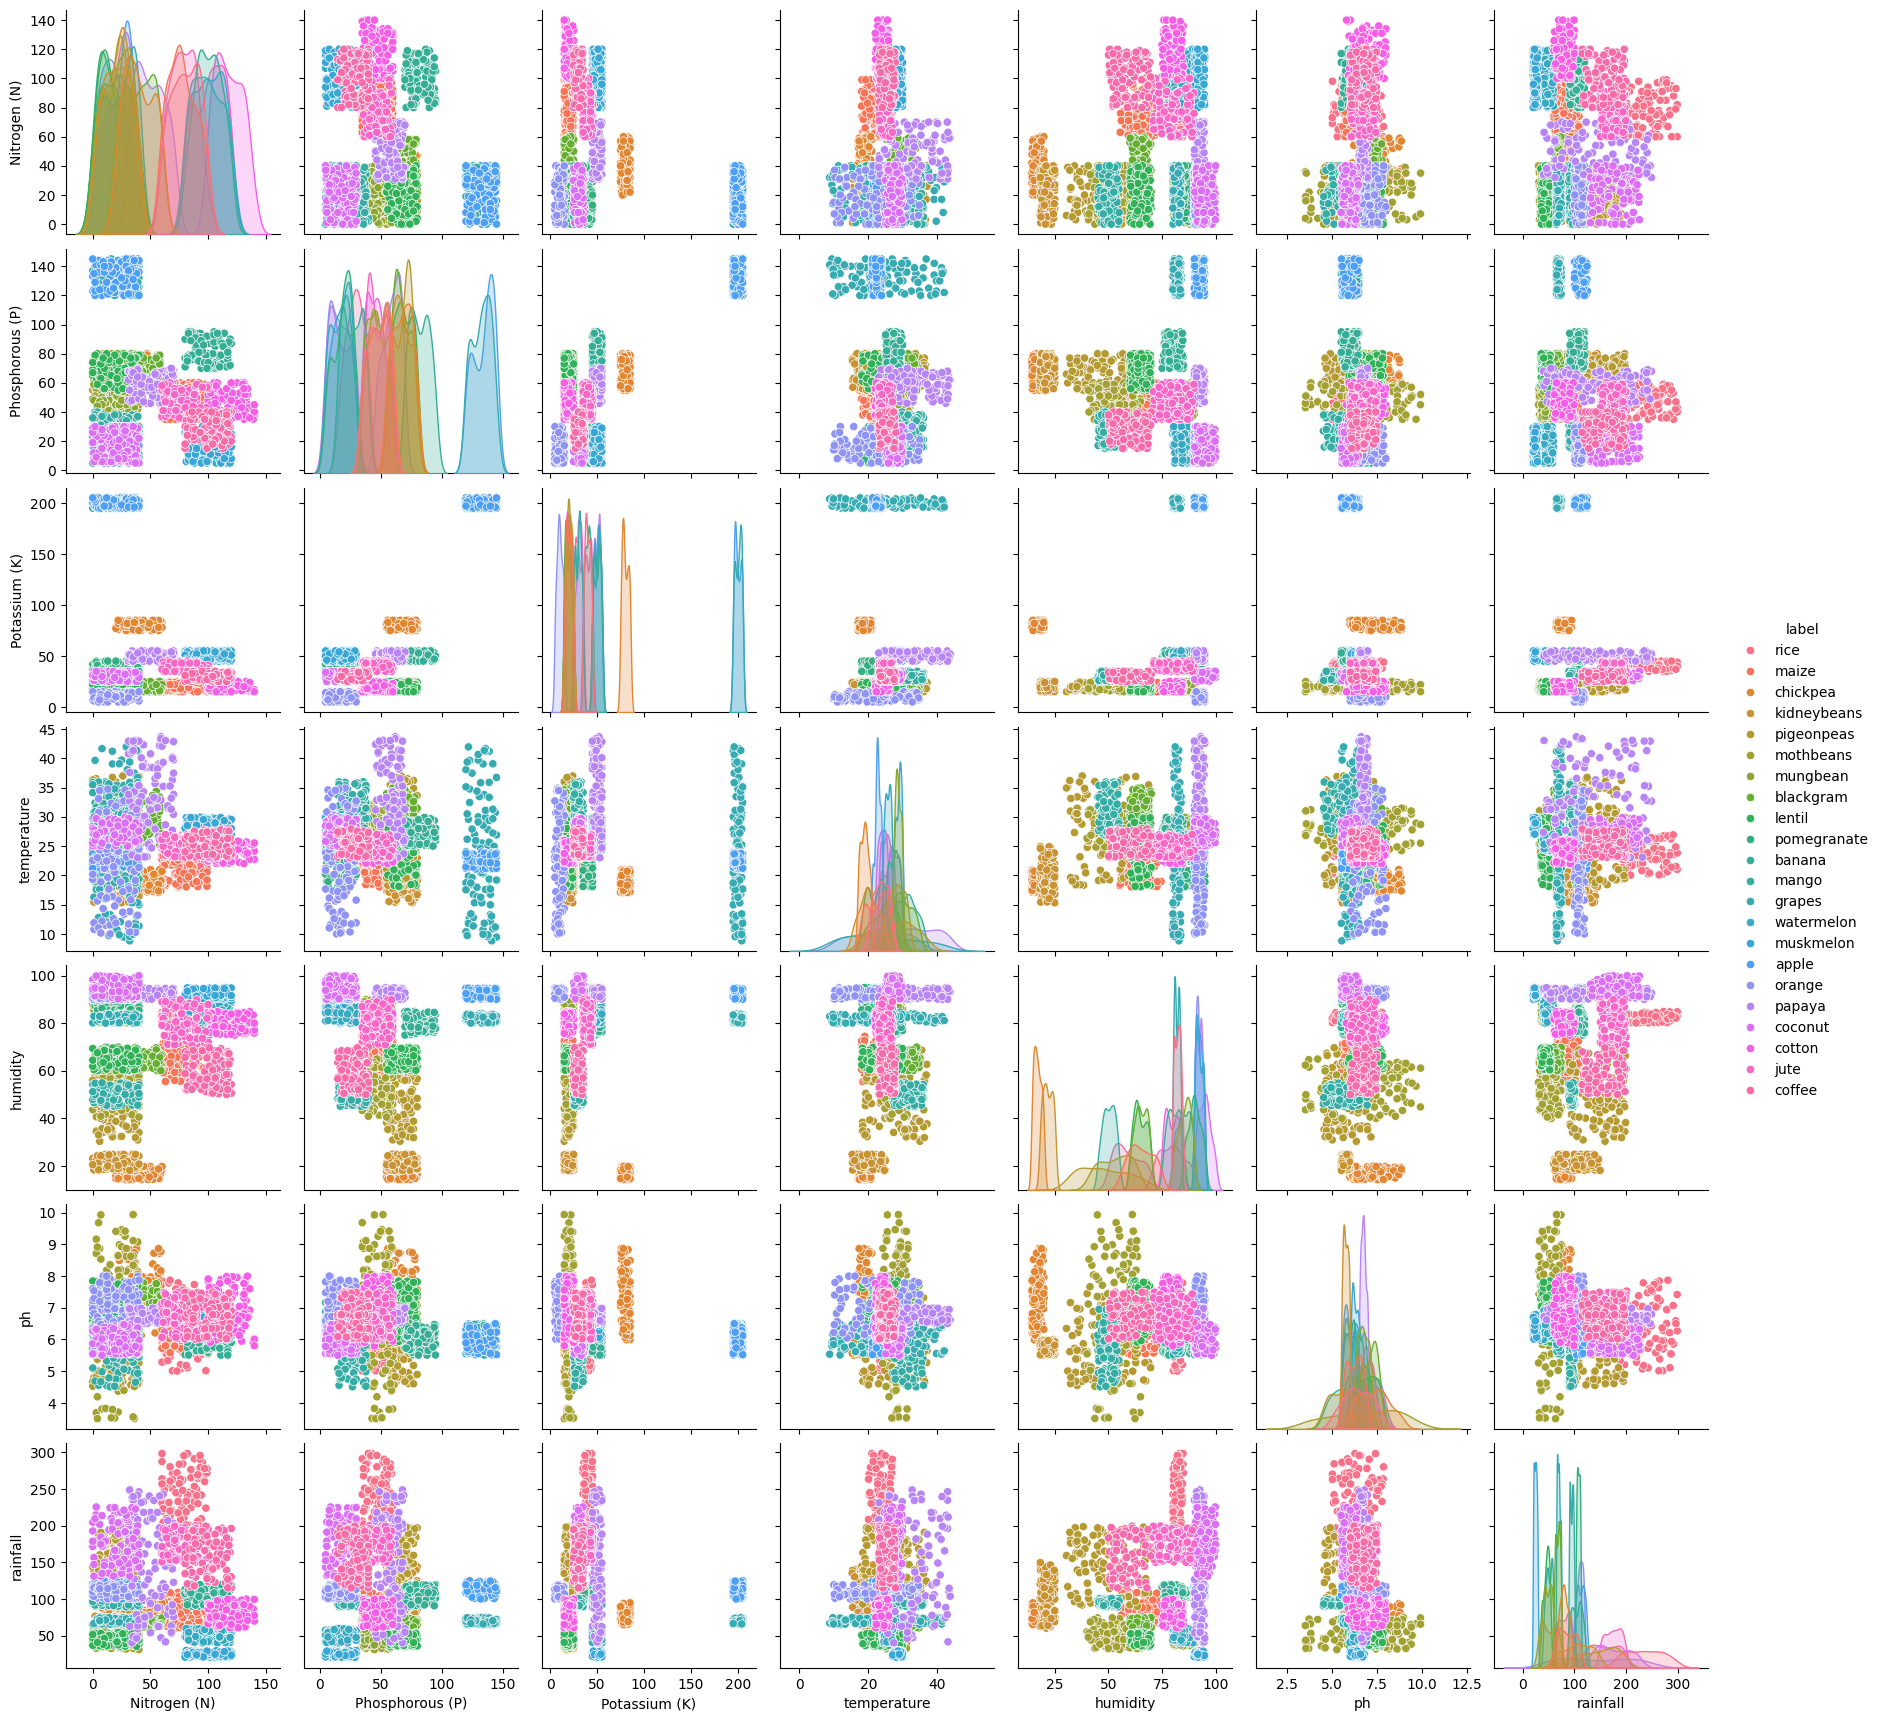

In [ ]:
sns.pairplot(data=df, hue = 'label')

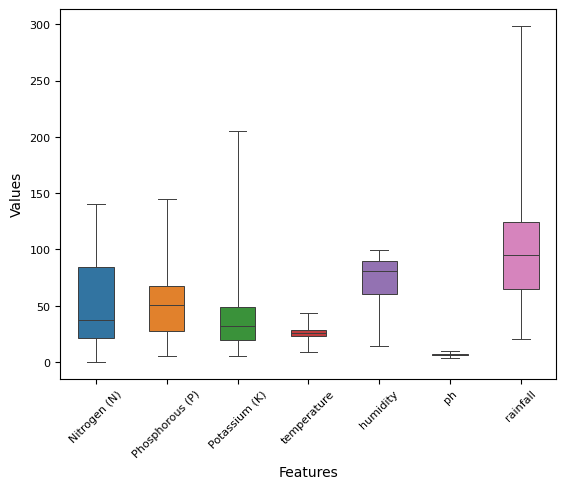

In [ ]:
# Create a box plot for my data
splot = sns.boxplot(data=df_2, whis=np.inf,
        width=0.5, linewidth = 0.7)

# Labels and clean up on the plot
splot.set_ylabel('Values', fontsize=10)
splot.set_xlabel('Features', fontsize=10)
splot.tick_params(labelsize=8)
splot.yaxis.grid(True, clip_on=False)
plt.xticks(rotation=45)
splot.grid(False)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Nitrogen (N)'),
  Text(1.5, 0, 'Phosphorous (P)'),
  Text(2.5, 0, 'Potassium (K)'),
  Text(3.5, 0, 'temperature'),
  Text(4.5, 0, 'humidity'),
  Text(5.5, 0, 'ph'),
  Text(6.5, 0, 'rainfall')])

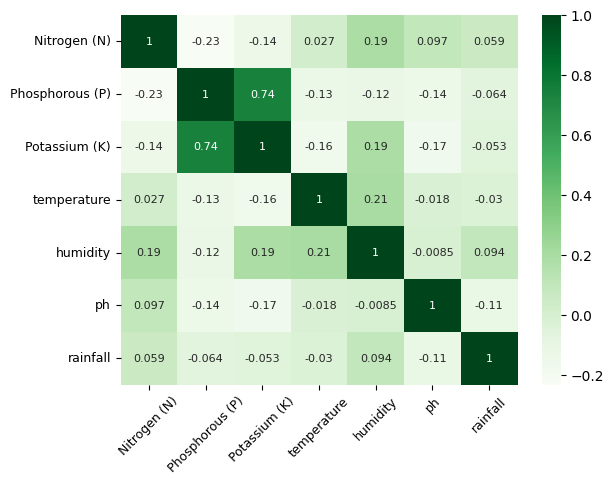

In [ ]:
cormat = df_2.corr()
round(cormat,2)
hplot = sns.heatmap(cormat,cmap="Greens", annot=True, annot_kws={"size": 8})
hplot.tick_params(labelsize=9)
plt.xticks(rotation=45)

In [ ]:
#Data Pre-Processing

In [ ]:
#Convert labels into categories codes
r = df.label.astype('category')
response = dict(enumerate(r.cat.categories))
df['response']=r.cat.codes

#Declare and set y and X variables
y=df.response
X=df[['Nitrogen (N)','Phosphorous (P)','Potassium (K)','temperature','humidity','ph','rainfall']]

In [ ]:
#Data Split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [ ]:
len(X_train)

1760

In [ ]:
#Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#-----------------------------------------Implementation of SVM Classifier-----------------------------------------------

In [ ]:
model_svm = svm.SVC(kernel='rbf', C=10)

In [ ]:
#Training of classifier on training data
model_svm.fit(X_train_scaled, y_train)

#Prediction
y_pred = model_svm.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ", accuracy)

Accuracy:  0.993


In [ ]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.993
Recall: 0.993
F1 Score: 0.993


In [ ]:
# K-fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train3, y_train3 = X.iloc[train_index], y.iloc[train_index]
    X_test3, y_test3 = X.iloc[test_index], y.iloc[test_index]
    model_svm.fit(X_train3, y_train3)

    y_pred = model_svm.predict(X_test3)
    score = accuracy_score(y_test3, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.985


In [ ]:
#-----------------------------------------Implementation of Decision Tree Model-----------------------------------------------

In [ ]:
#Decision Tree classifier object
model_dt = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state=10)

In [ ]:
#Training of classifier on training data
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [ ]:
#Prediction
y_pred = model_dt.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ", accuracy)

Accuracy:  0.991


In [ ]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.992
Recall: 0.991
F1 Score: 0.991


In [ ]:
# K-fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train2, y_train2 = X.iloc[train_index], y.iloc[train_index]
    X_test2, y_test2 = X.iloc[test_index], y.iloc[test_index]

    model_dt.fit(X_train2, y_train2)

    y_pred = model_dt.predict(X_test2)
    score = accuracy_score(y_test2, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.986


In [ ]:
#-----------------------------------------Implementation of Random Forest-----------------------------------------------

In [ ]:
model_rf = RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [ ]:
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [ ]:
#Prediction
y_pred = model_rf.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ", accuracy)

Accuracy:  0.998


In [ ]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.998
Recall: 0.998
F1 Score: 0.998


In [ ]:
# K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train_k, y_train_k = X.iloc[train_index], y.iloc[train_index]
    X_test_k, y_test_k = X.iloc[test_index], y.iloc[test_index]
    model_rf.fit(X_train_k, y_train_k)

    y_pred = model_rf.predict(X_test_k)
    score = accuracy_score(y_test_k, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.99


([<matplotlib.axis.XTick at 0x7c41d257b990>,
 [Text(0, 0, 'humidity'),
  Text(1, 0, 'rainfall'),
  Text(2, 0, 'Potassium (K)'),
  Text(3, 0, 'Phosphorous (P)'),
  Text(4, 0, 'Nitrogen (N)'),
  Text(5, 0, 'temperature'),
  Text(6, 0, 'ph')])

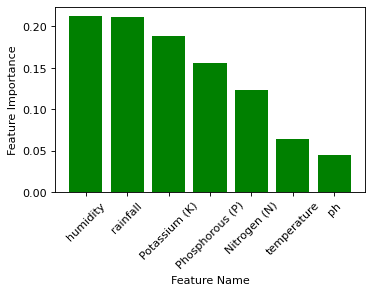

In [ ]:
plt.figure(figsize=(5, 3), dpi=80)
importance_sorted = sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True)
feature_importance = [imp for imp, _ in importance_sorted]
feature_names = [name for _, name in importance_sorted]

c_features = len(feature_importance)
plt.bar(range(c_features), feature_importance, color = "green")
plt.ylabel("Feature Importance")
plt.xlabel("Feature Name")
plt.xticks(np.arange(c_features), feature_names, rotation=45)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pickle

# Function to load the CSV file
def load_data(csv_file_path):

    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_file_path)
    return df

# Define the function to train and save the ML model
def train_and_save_model(df, model_file_path):

    # Select features and target variable
    X = df[['N', 'P', 'K']]
    y = df['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train the Gaussian Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Save the trained model using pickle
    pickle.dump(model, open(model_file_path, 'wb'))

# Define the function to predict the crop
def predict_crop(df, model, N, P, K):

    # Create a new DataFrame with the input NPK levels
    new_data = pd.DataFrame({'N': [N], 'P': [P], 'K': [K]})

    # Use the trained model to predict the crop
    prediction = model.predict(new_data)[0]

    # Get the crop name from the DataFrame
    crop_name = df[df['label'] == prediction]['label'].iloc[0]
    return f"Recommended Crop: {crop_name}"

# Get CSV file path from the user
csv_file_path = input("Enter the path to the CSV file: ")
model_file_path = input("Enter the path to save the trained model: ")

# Load the data
df = load_data(csv_file_path)

# Train and save the model
train_and_save_model(df, model_file_path)

# Get NPK levels from the user
input_N = int(input("Enter Nitrogen (N) level: "))
input_P = int(input("Enter Phosphorus (P) level: "))
input_K = int(input("Enter Potassium (K) level: "))

# Load the saved model
model = pickle.load(open(model_file_path, 'rb'))

# Predict the crop
crop_recommendation = predict_crop(df, model, input_N, input_P, input_K)
print(crop_recommendation)

Enter the path to the CSV file: /content/crop_recommendation.csv
Enter the path to save the trained model: mohit
Enter Nitrogen (N) level: 34
Enter Phosphorus (P) level: 23
Enter Potassium (K) level: 45
Recommended Crop: pomegranate


In [ ]:
# Load XLNet tokenizer and model
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
model = XLNetModel.from_pretrained("xlnet-base-cased")

In [ ]:
# prompt: ResNeXt50 + CNN using the crop recommendation dataset

import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np

# Assuming your image data is in a folder named 'images' and your labels are in 'crop_recommendation.csv'
# Adjust these paths as needed

# Load the dataset
df = pd.read_csv('/content/crop_recommendation.csv') # already loaded in the provided code
# Preprocess the data (assuming you have a column named 'label' with crop names)
# ... (preprocessing from the original code can be reused here)


# Define a function to load and preprocess images
def load_image(image_path):
    try:
      image = Image.open(image_path)
      preprocess = transforms.Compose([
          transforms.Resize(256),
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      ])
      image = preprocess(image)
      return image
    except (FileNotFoundError, OSError):
        print(f"Error loading image: {image_path}")
        return None

# Load the pre-trained ResNeXt50 model
resnet = models.resnext50_32x4d(pretrained=True)

# Modify the final fully connected layer for your number of crop classes
num_classes = len(df['label'].unique())
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Define the CNN part (this can be combined with ResNeXt later)
class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(16 * 112 * 112, num_classes) # adjust input size as needed

  def forward(self, x):
    x = self.pool1(self.relu1(self.conv1(x)))
    x = x.view(-1, 16 * 112 * 112)
    x = self.fc1(x)
    return x

# Combined model (adjust as necessary for your specific architecture)
class CombinedModel(nn.Module):
  def __init__(self, resnet, cnn, num_classes):
    super().__init__()
    self.resnet = resnet
    self.cnn = cnn
    self.final_fc = nn.Linear(num_classes * 2, num_classes) # Example: combining outputs

  def forward(self, image_input):
      resnet_output = self.resnet(image_input)
      cnn_output = self.cnn(image_input)
      combined_output = torch.cat((resnet_output, cnn_output), dim=1)
      final_output = self.final_fc(combined_output)
      return final_output

# Create an instance of the model
cnn_model = CNN(num_classes)
combined_model = CombinedModel(resnet, cnn_model, num_classes)


# Example of how to use the model (requires image data paths)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
combined_model.to(device)
image = load_image('/path/to/your/image.jpg')
if image is not None:
  with torch.no_grad():
    image = image.unsqueeze(0).to(device)
    outputs = combined_model(image)
    _, predicted = torch.max(outputs, 1)
  print(f"Predicted class: {predicted.item()}")

# Continue training and evaluation
# ... (add training loop, optimizer, loss function, etc. as in the original code)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Error loading image: /path/to/your/image.jpg


In [ ]:
# prompt: VGG16 + CNN using the crop recommendation dataset

!pip install transformers
from transformers import XLNetTokenizer, XLNetModel
# ... (rest of your existing code)

# Assuming your image data is in a folder named 'images' and your labels are in 'crop_recommendation.csv'
# Adjust these paths as needed

image_dir = '/content/images' # Replace with the actual path to your image directory
if not os.path.exists(image_dir):
    os.makedirs(image_dir) # Create the directory if it doesn't exist


# Example of how to use the model (requires image data paths)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
combined_model.to(device)

# Example usage (assuming you have images in the 'images' directory)
for filename in os.listdir(image_dir):
  if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
    image_path = os.path.join(image_dir, filename)
    image = load_image(image_path)
    if image is not None:
        with torch.no_grad():
            image = image.unsqueeze(0).to(device)
            outputs = combined_model(image)
            _, predicted = torch.max(outputs, 1)
            print(f"Image: {filename}, Predicted class: {predicted.item()}")
